In [1]:
import torch
import numpy as np
import wandb

import os
if os.path.split(os.getcwd())[-1] != 'src':
    os.chdir('../src')
    
import matplotlib.pyplot as plt
from collections import defaultdict

import networkx as nx
import cdt
cdt.SETTINGS.rpath = '/usr/local/bin/Rscript' # for macOS

import data_generation.causal_graphs.graph_generation as graph_gen
import data_generation.causal_graphs.graph_visualization as visual
import data_generation.data_generation as data_gen
import models.multivar_mlp as mmlp
import causal_discovery.prepare_data as cd
import outlier_detection.model_based as ood

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


## DAG generation (chain)

In [2]:
equations = defaultdict(dict)
equations['A']['input_names'] = []
equations['A']['mu_fn'] = lambda inputs : 0
equations['A']['sigma_fn'] = lambda inputs : 0.5 

equations['B']['input_names'] = ['A']
equations['B']['mu_fn'] = lambda inputs : inputs['A']
equations['B']['sigma_fn'] = lambda inputs : 0.5

equations['C']['input_names'] = ['B']
equations['C']['mu_fn'] = lambda inputs : inputs['B']
equations['C']['sigma_fn'] = lambda inputs : 0.5

equations['D']['input_names'] = ['C']
equations['D']['mu_fn'] = lambda inputs : inputs['C']
equations['D']['sigma_fn'] = lambda inputs : 0.5

equations['E']['input_names'] = ['D']
equations['E']['mu_fn'] = lambda inputs : inputs['D']
equations['E']['sigma_fn'] = lambda inputs : 0.5      

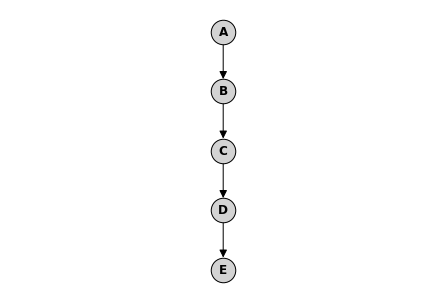

In [3]:
dag = graph_gen.generate_graph_from_equations(equations) 
visual.visualize_graph(dag, show_plot=True)

## Hparams

In [5]:
variables = list(equations.keys())

N_OBS = 10000
INT_RATIO = 0.01
BATCH_SIZE = 128
LR = 1e-3
EPOCHS = 5
FIT_EPOCHS = 40
STDS = 4
NUM_VARS = len(variables)
ALPHA_SKELETON = 0.00000000000001
ALPHA = 0.1

loss = mmlp.nll
true_target_indices = np.cumsum([N_OBS] + [INT_RATIO * N_OBS] * NUM_VARS)
seeds = list(range(50))

In [6]:
# wandb config for logging
config = dict(
    n_obs = N_OBS,
    int_ratio = INT_RATIO,
    batch_size = BATCH_SIZE,
    lr = LR,
    epochs = EPOCHS,
    fit_epochs = FIT_EPOCHS,
    threshold = f'{STDS} stds',
    num_vars = NUM_VARS,
    graph_structure = 'chain',
    alpha_skeleton = ALPHA_SKELETON,
    alpha = ALPHA
    )

## Experiments
Causal discovery from detected interventions on different dataset samples from the above chain DAG. For this prototype, the intervention targets for detected interventions are assume as known. For false positives, all variables are set as intervention targets.

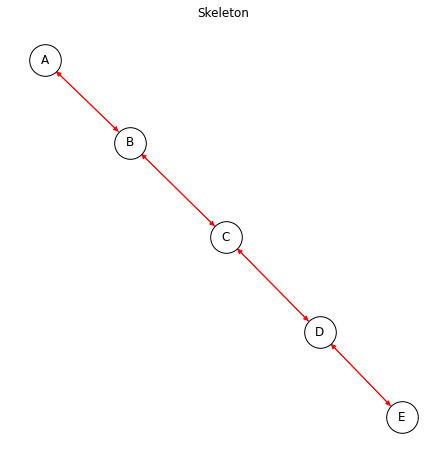

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


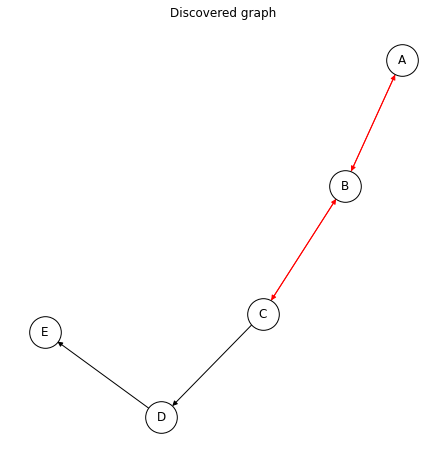

SHD,2


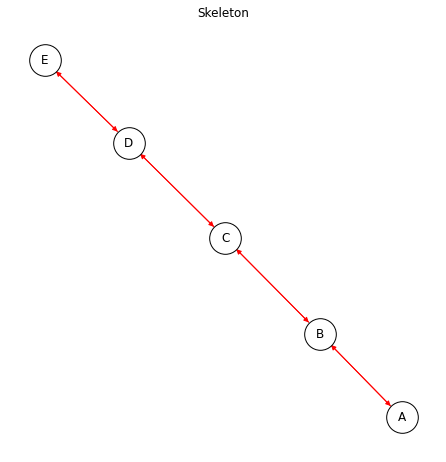

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


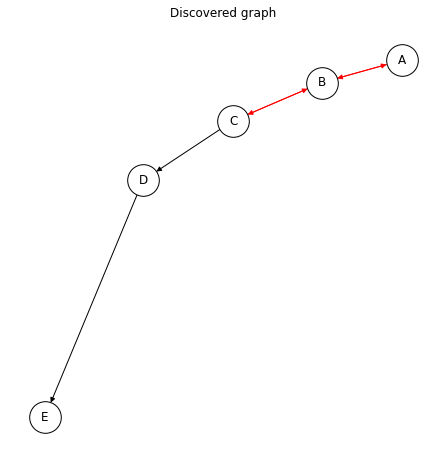

SHD,2


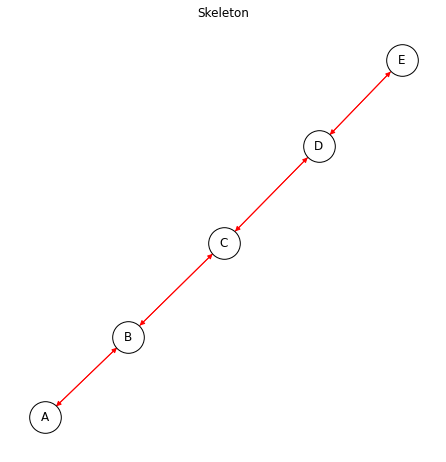

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


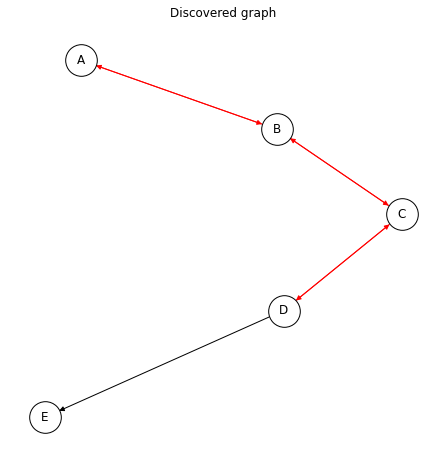

SHD,3


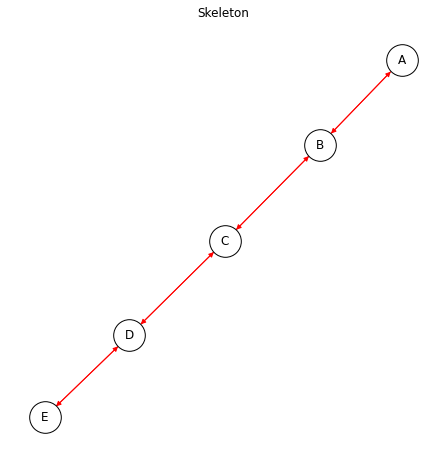

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


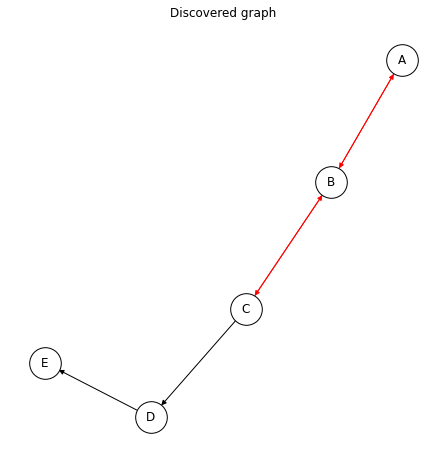

SHD,2


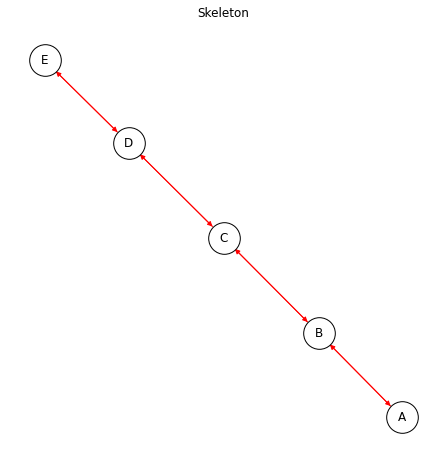

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


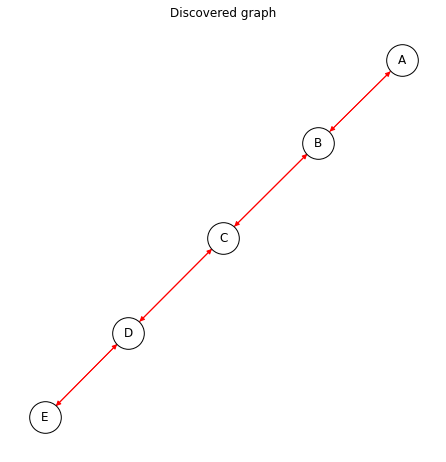

SHD,4


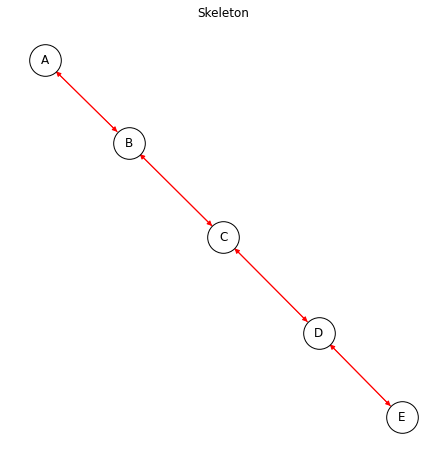

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


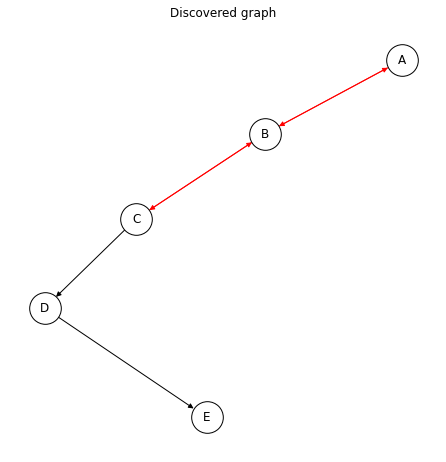

SHD,2


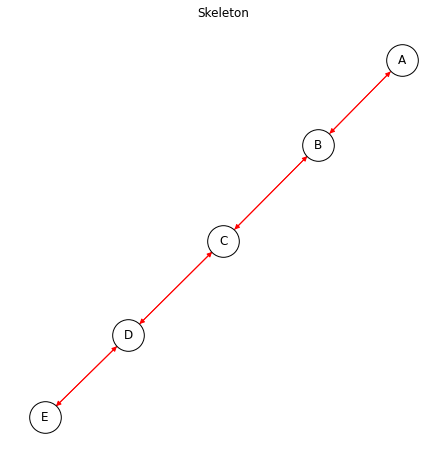

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


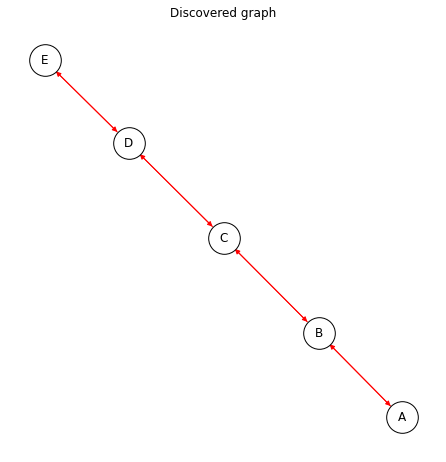

SHD,4


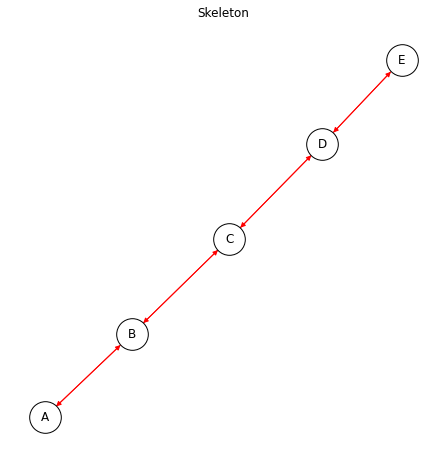

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


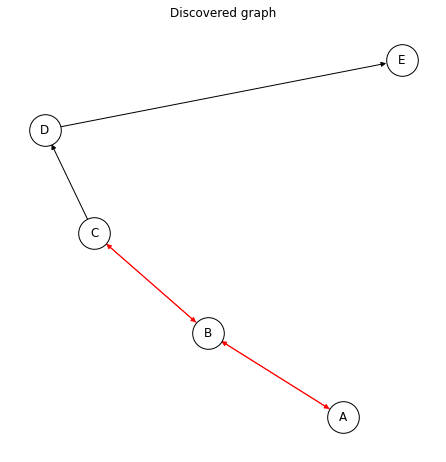

SHD,2


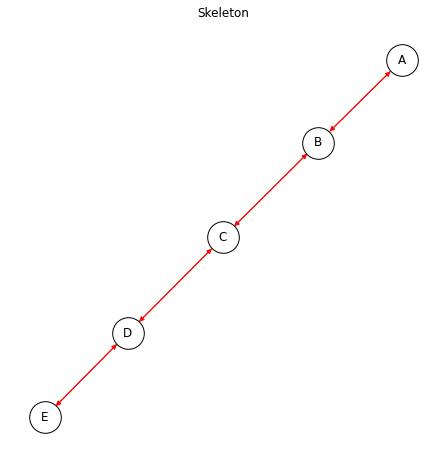

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


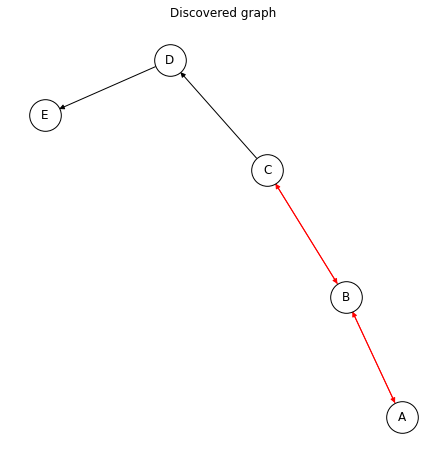

SHD,2


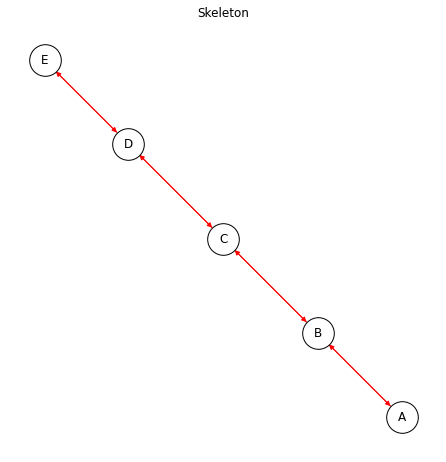

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


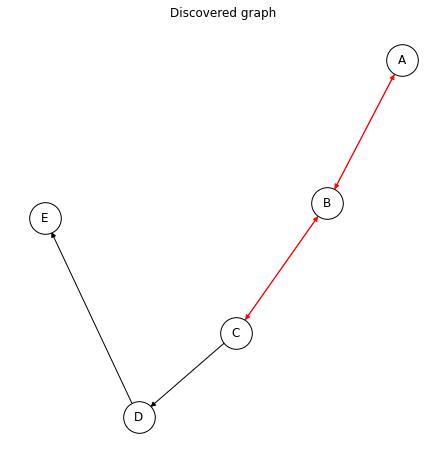

SHD,2


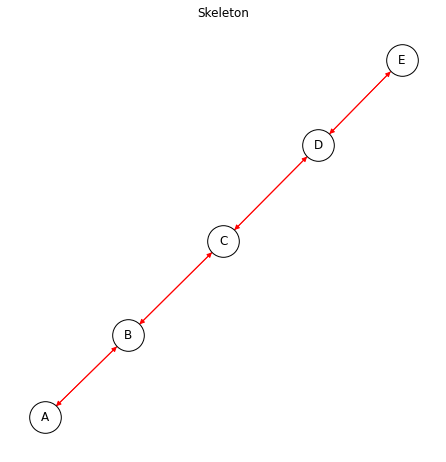

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


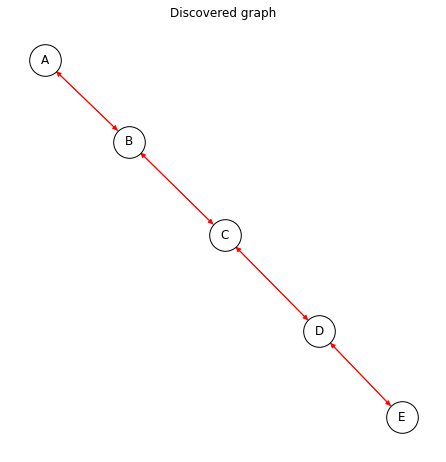

SHD,4


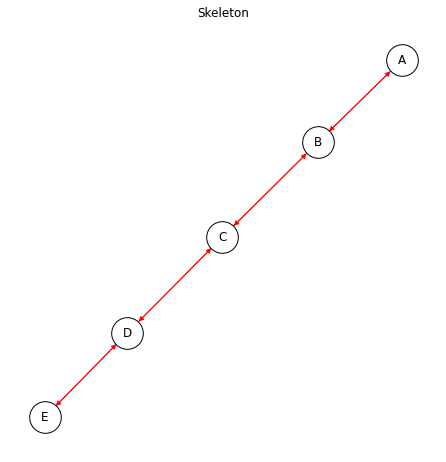

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


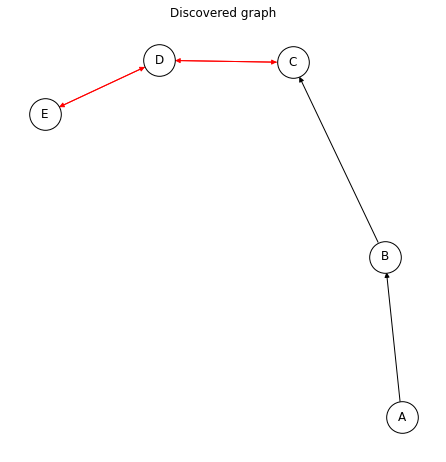

SHD,2


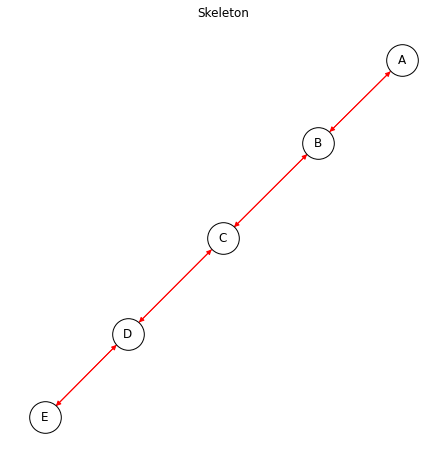

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


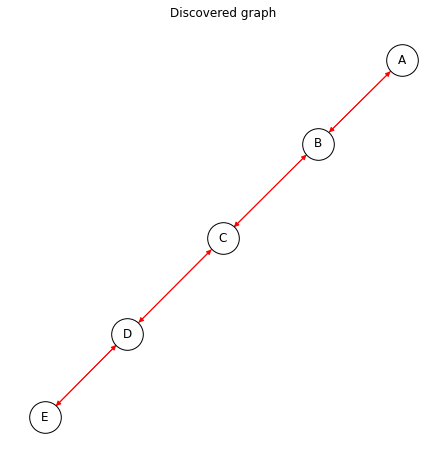

SHD,4


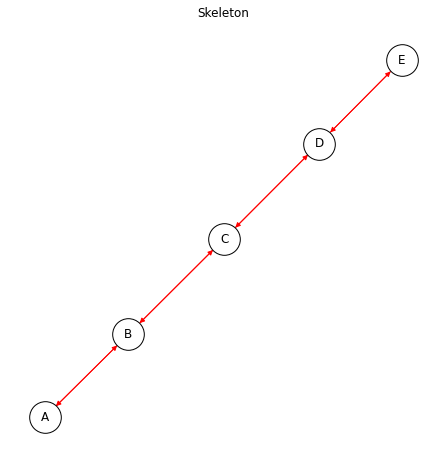

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


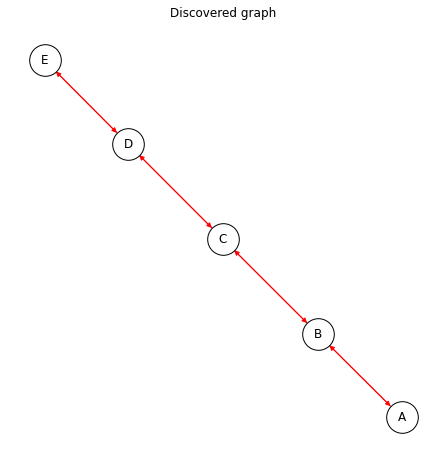

SHD,4


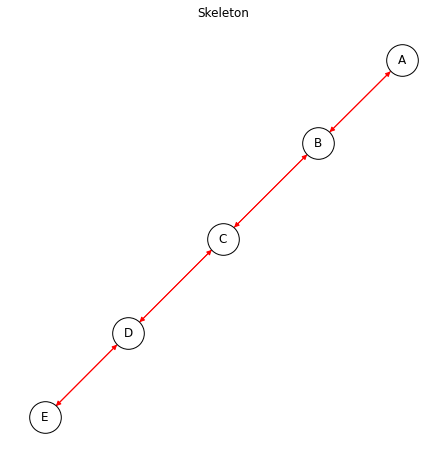

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


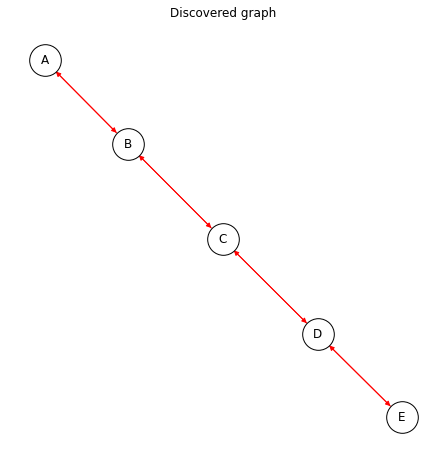

SHD,4


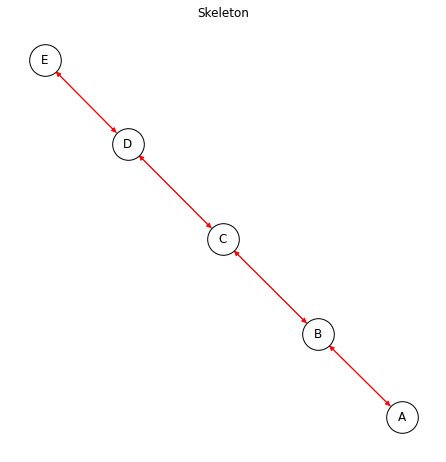

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


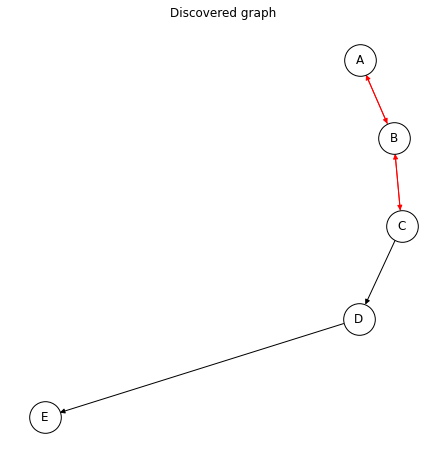

SHD,2


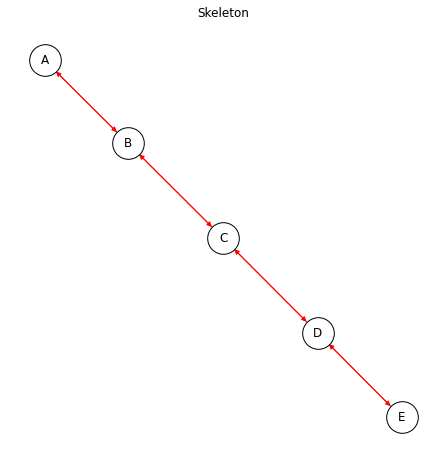

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


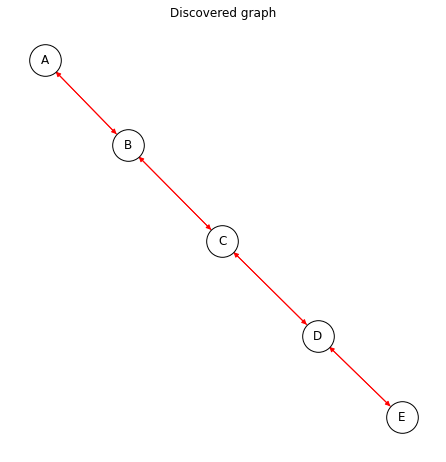

SHD,4


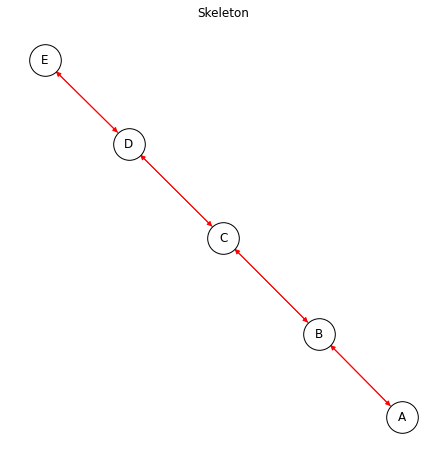

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


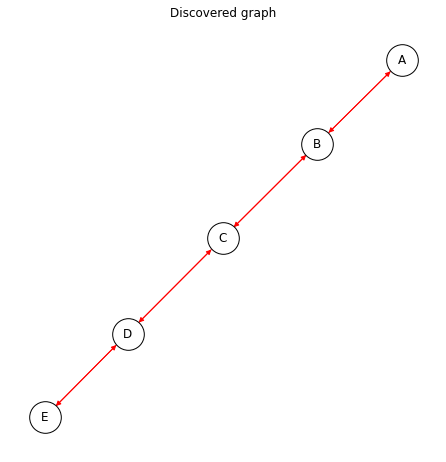

SHD,4


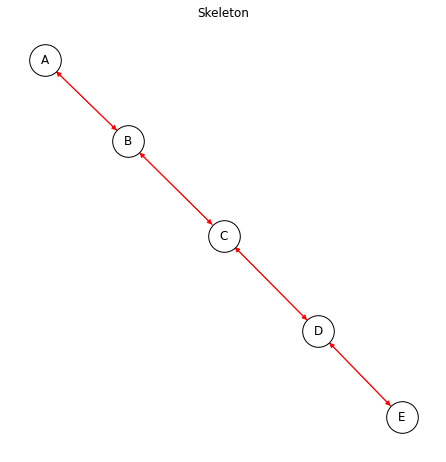

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


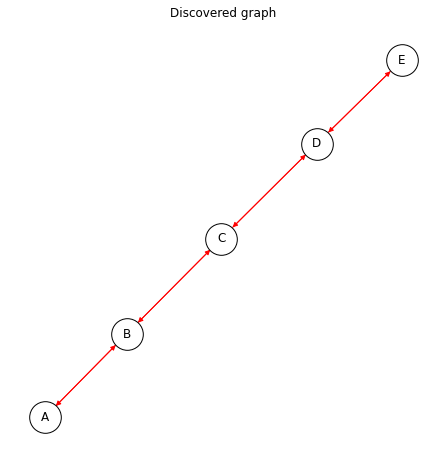

SHD,4


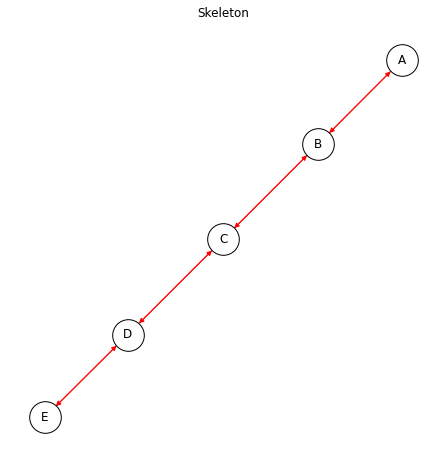

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


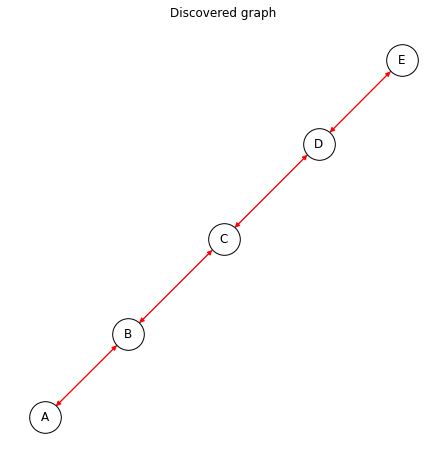

SHD,4


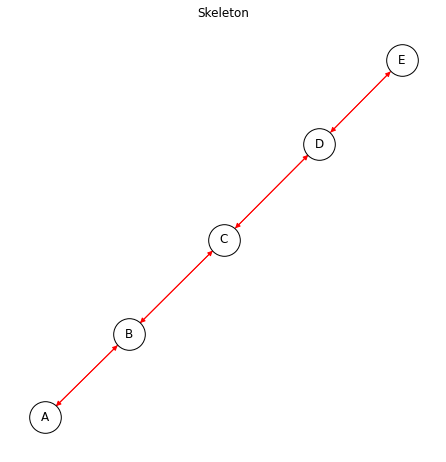

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


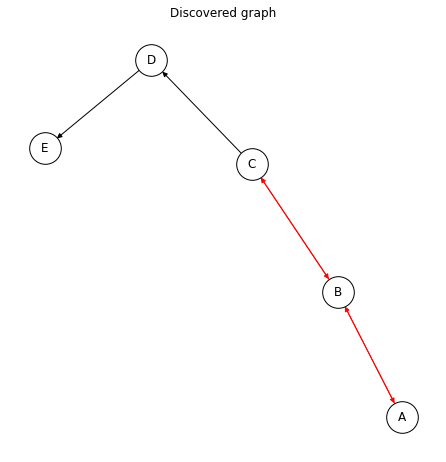

SHD,2


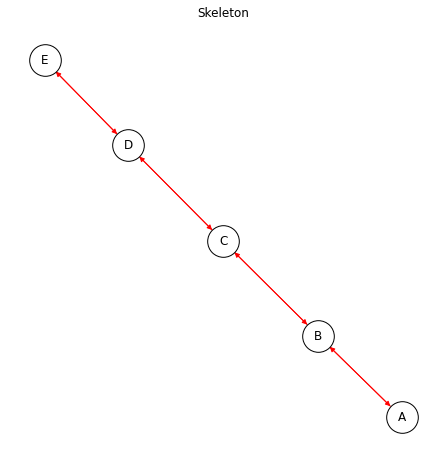

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


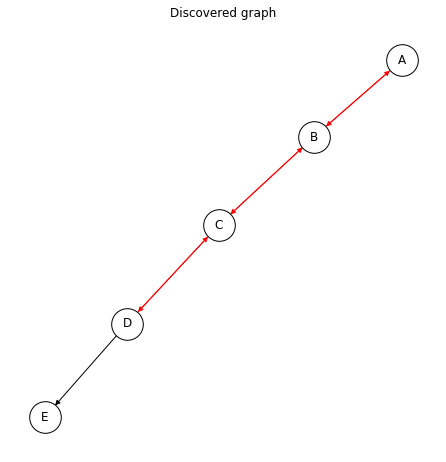

SHD,3


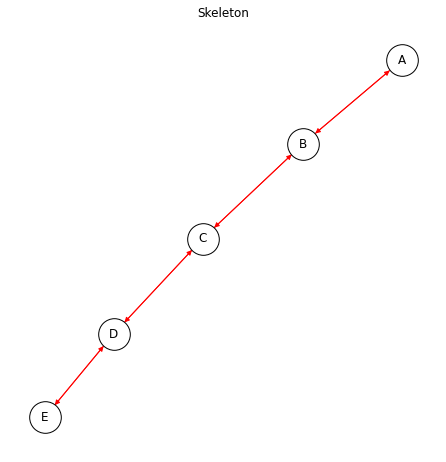

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


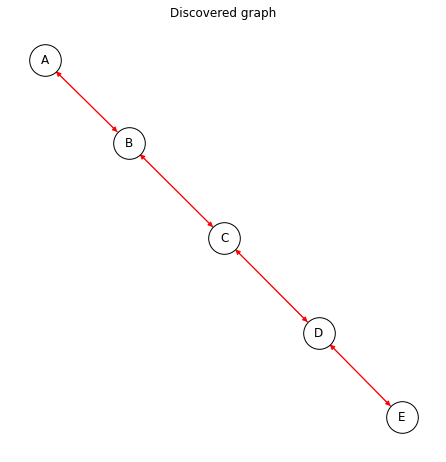

SHD,4


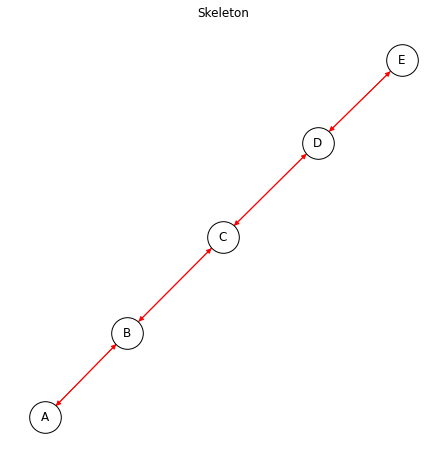

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


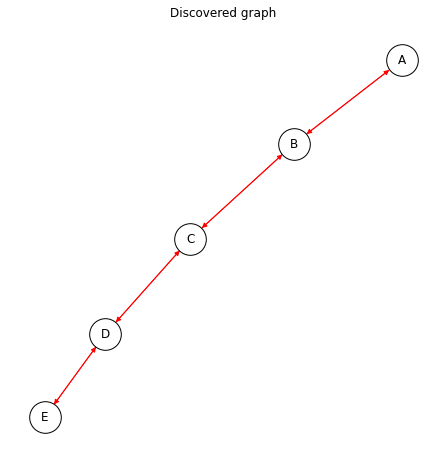

SHD,4


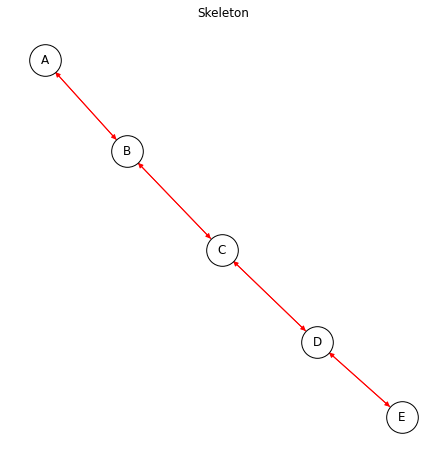

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


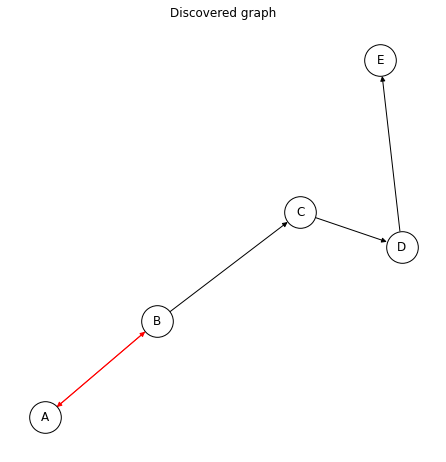

SHD,1


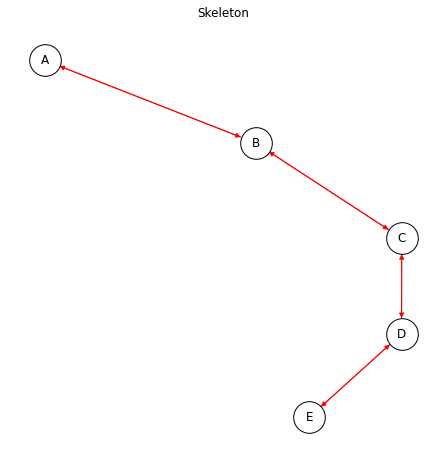

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


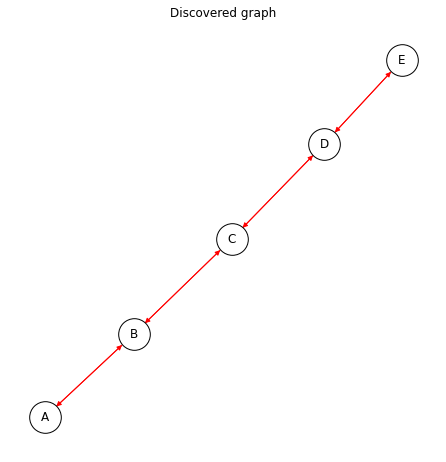

SHD,4


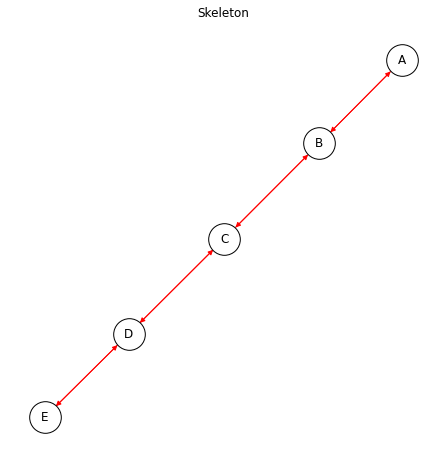

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


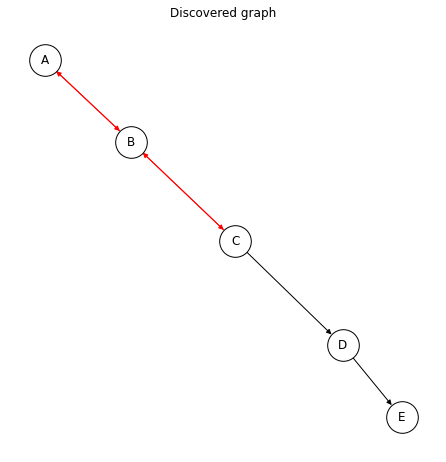

SHD,2


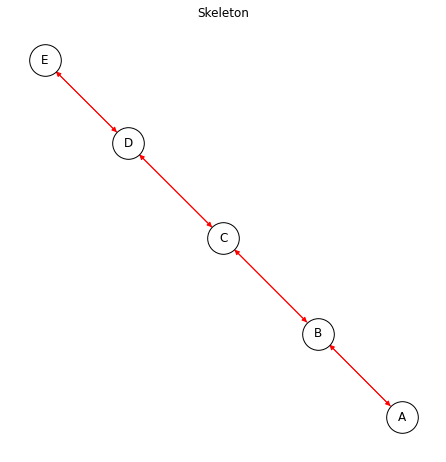

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


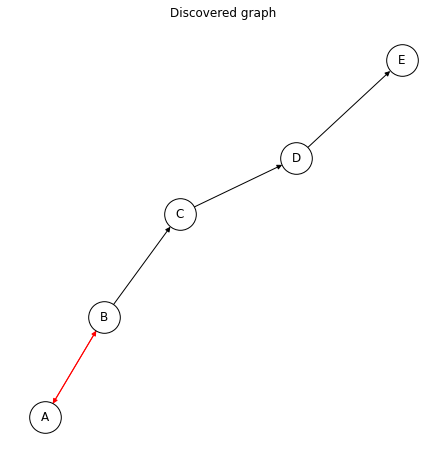

SHD,1


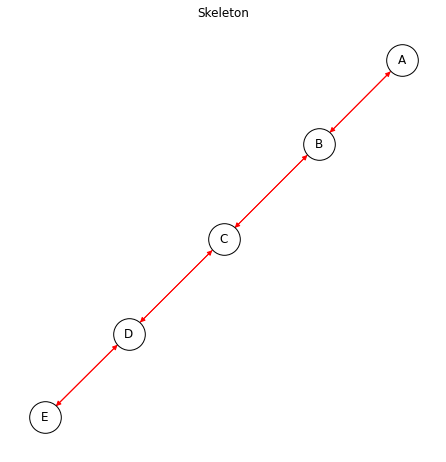

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


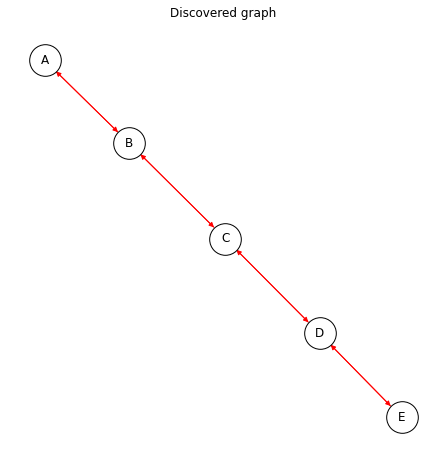

SHD,4


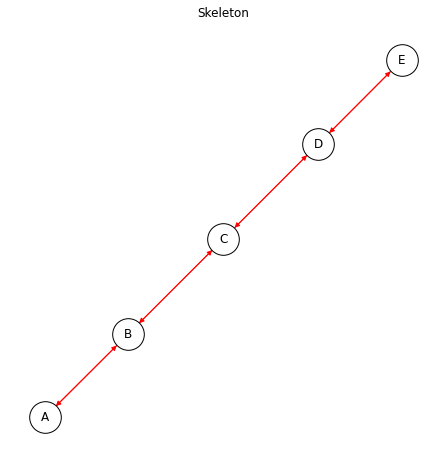

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


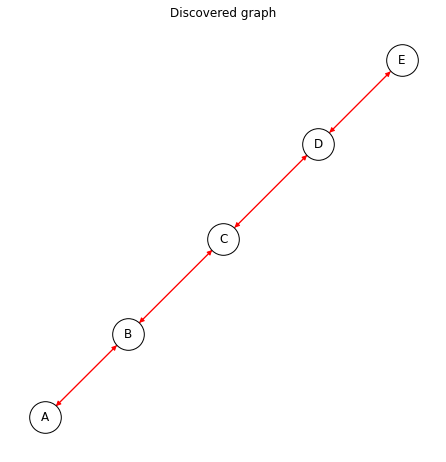

SHD,4


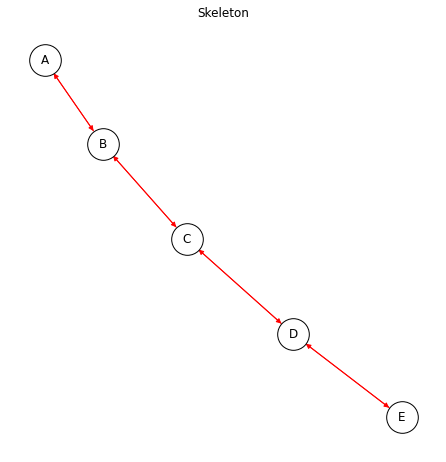

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


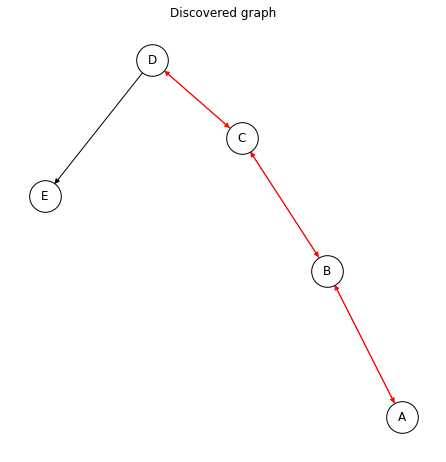

SHD,3


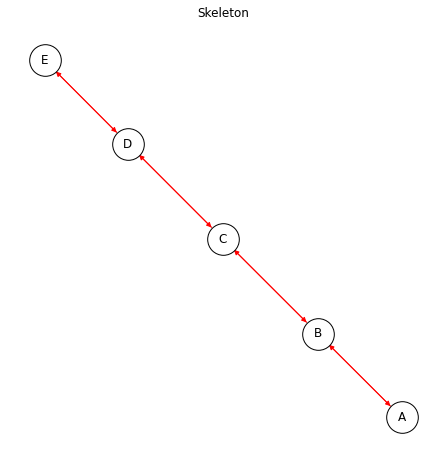

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


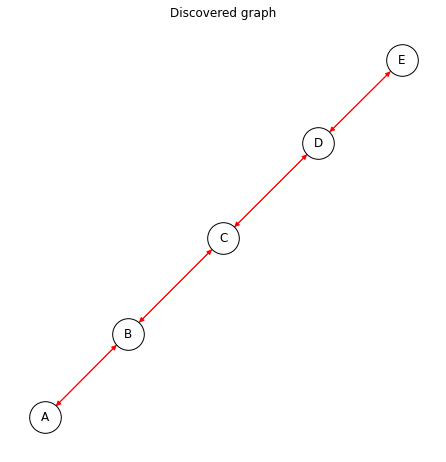

SHD,4


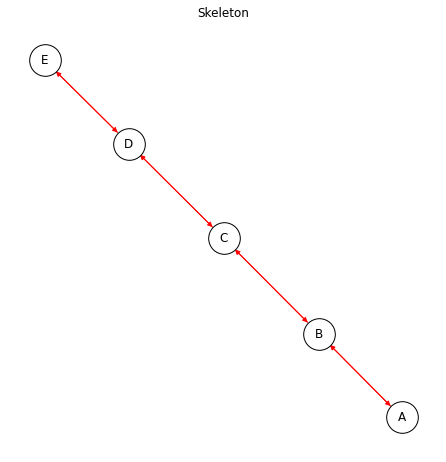

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


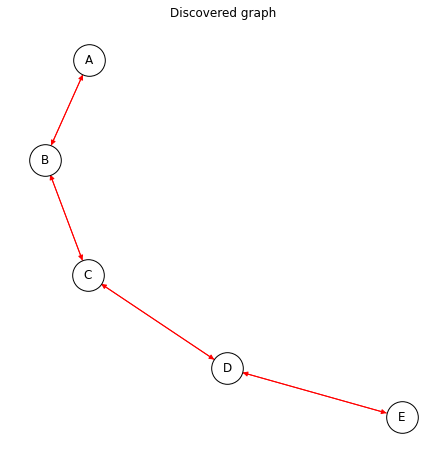

SHD,4


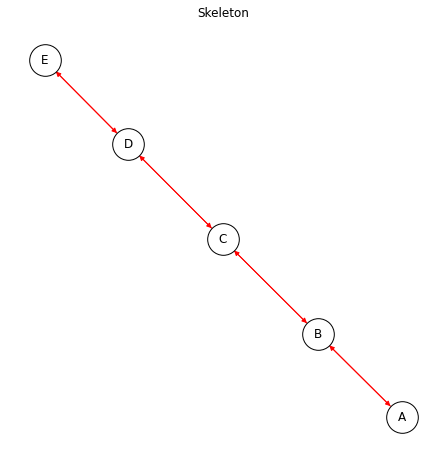

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


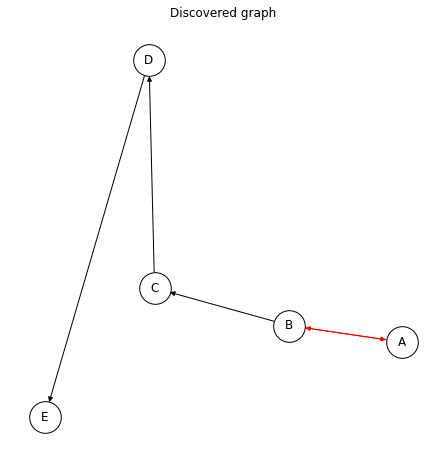

SHD,1


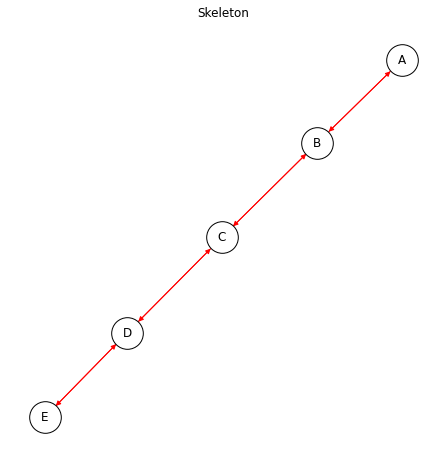

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


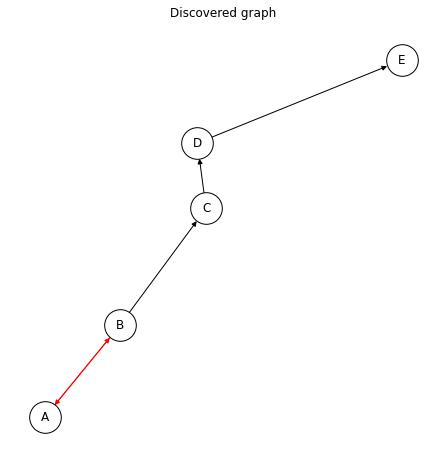

SHD,1


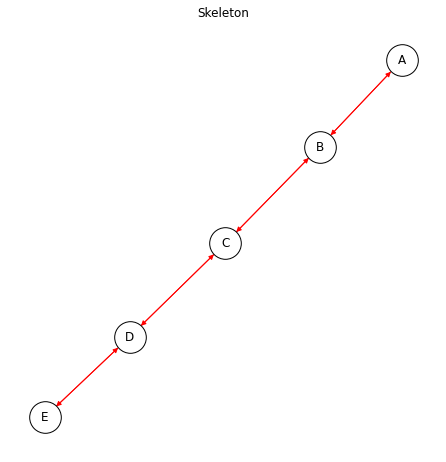

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


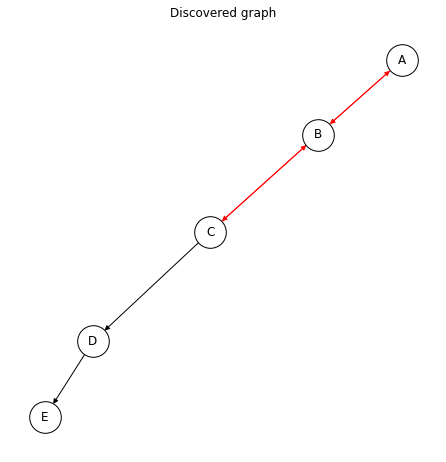

SHD,2


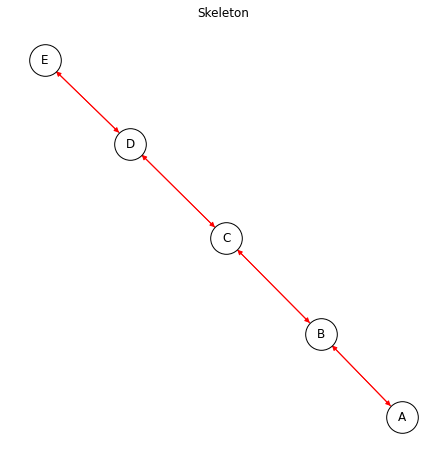

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


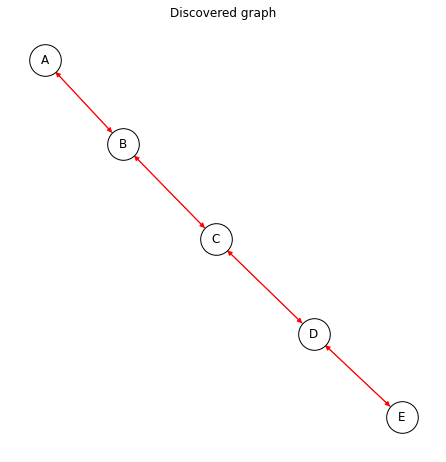

SHD,4


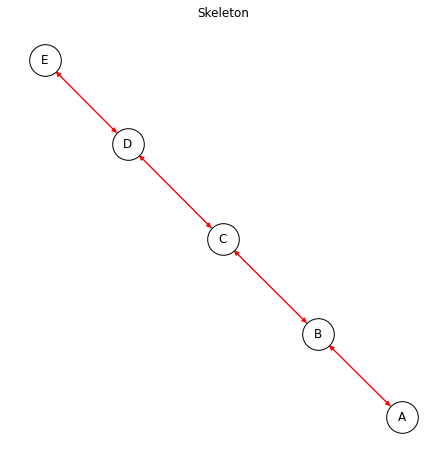

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


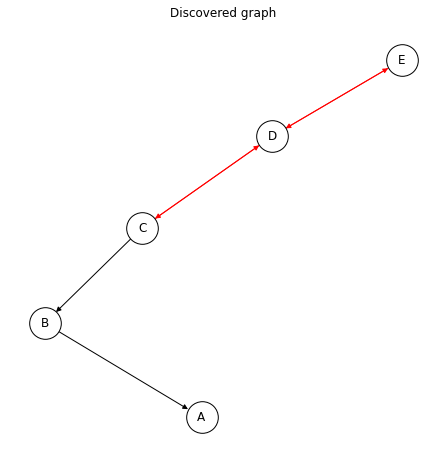

SHD,6


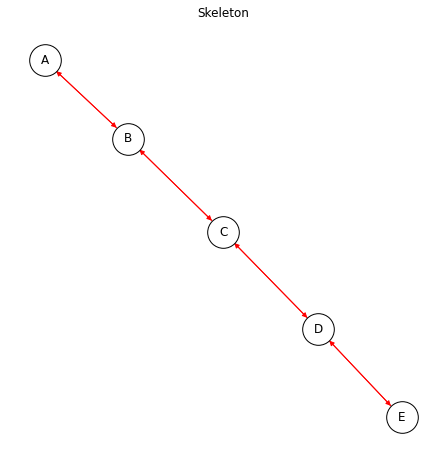

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


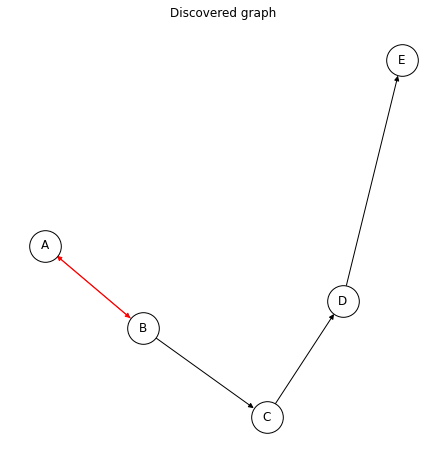

SHD,1


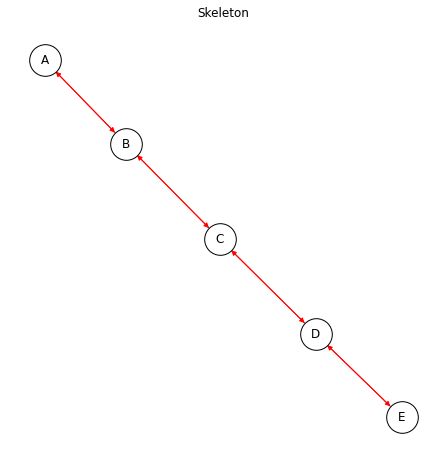

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


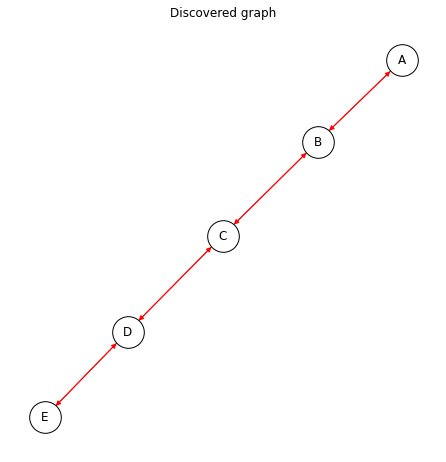

SHD,4


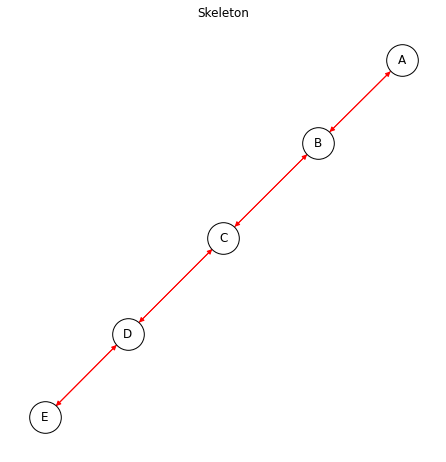

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


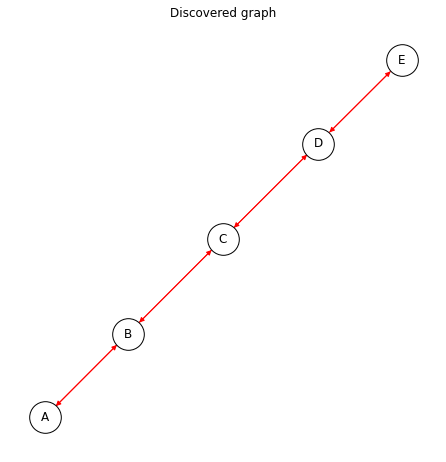

SHD,4


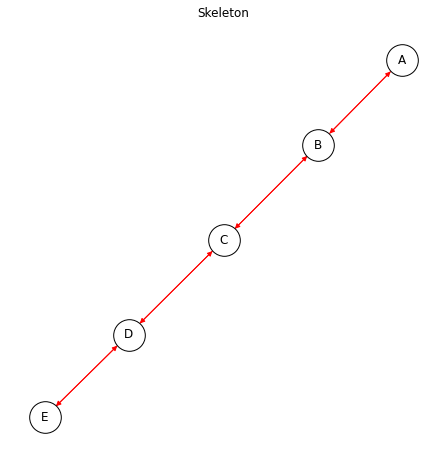

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


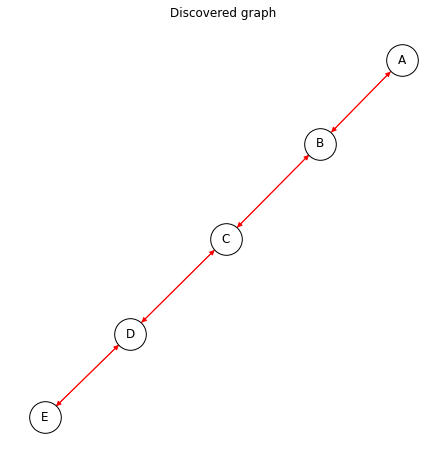

SHD,4


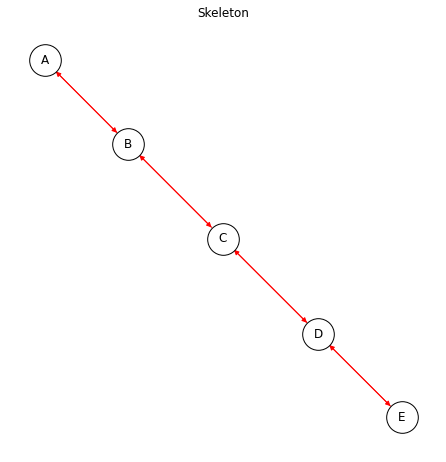

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


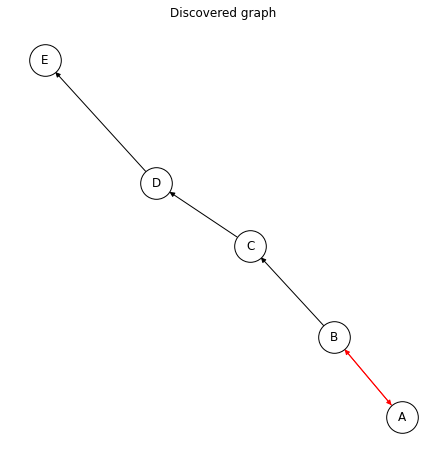

SHD,1


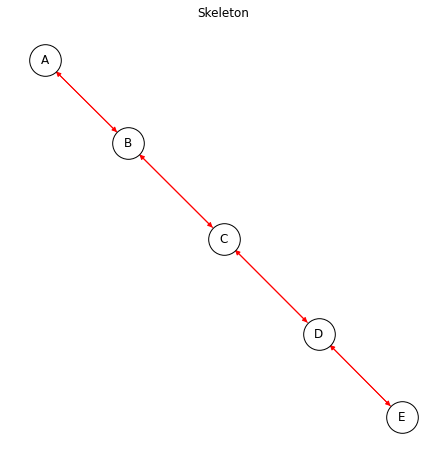

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


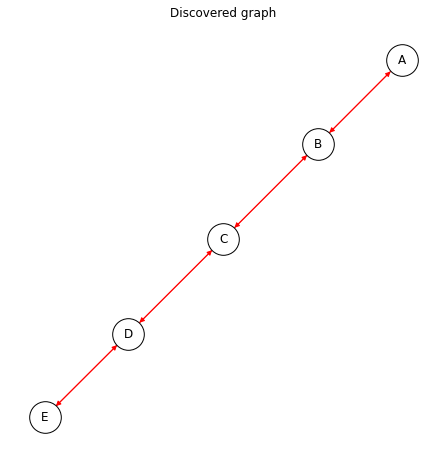

SHD,4


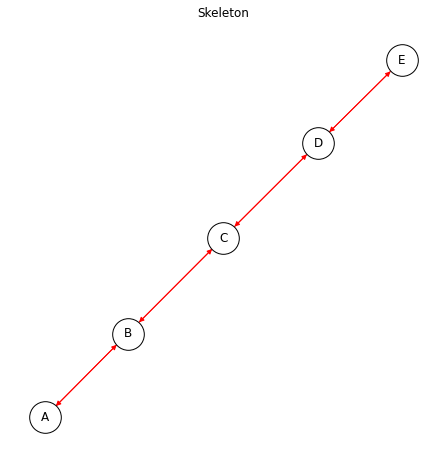

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


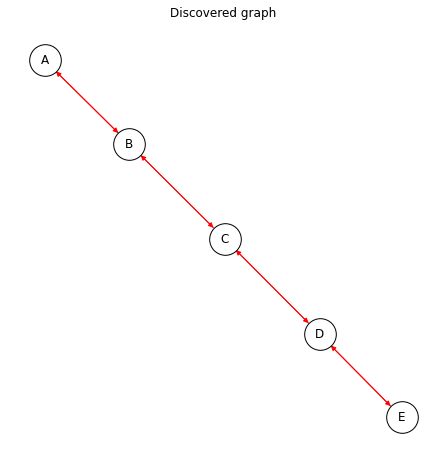

SHD,4


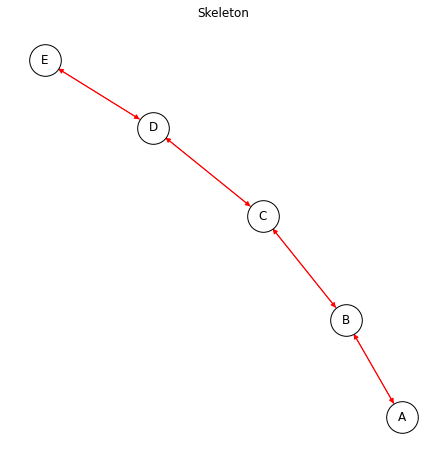

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


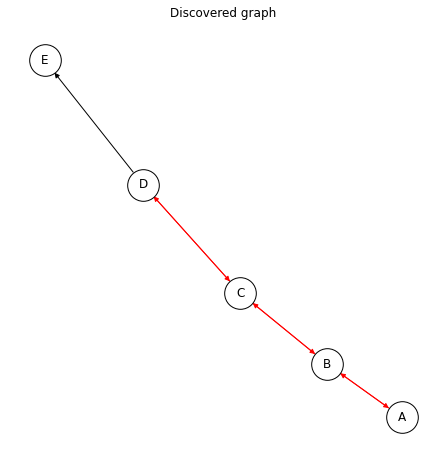

SHD,3


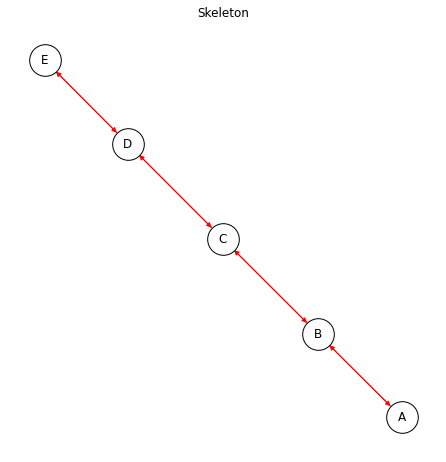

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


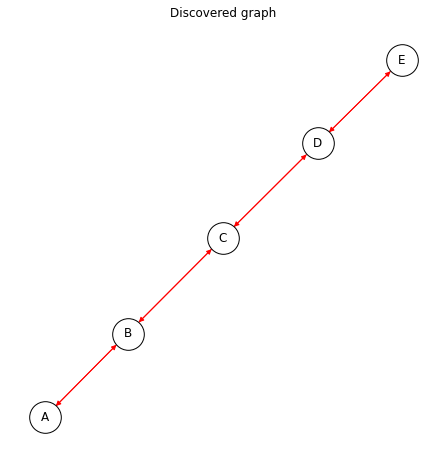

SHD,4


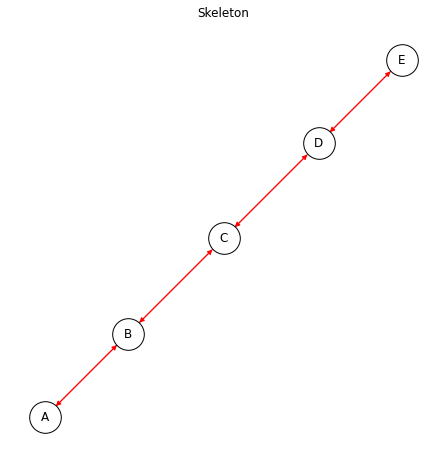

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


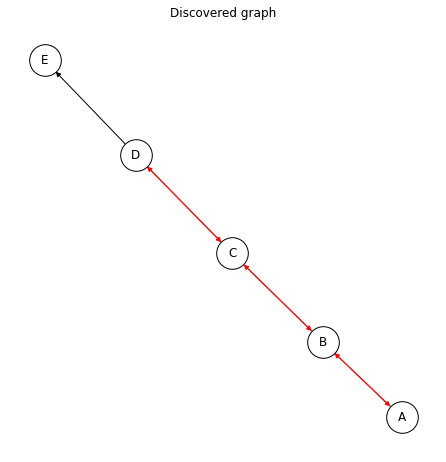

SHD,3


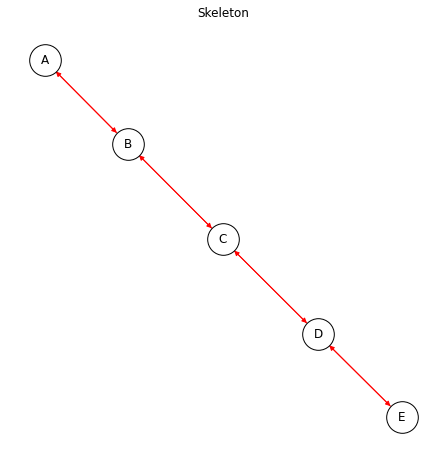

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


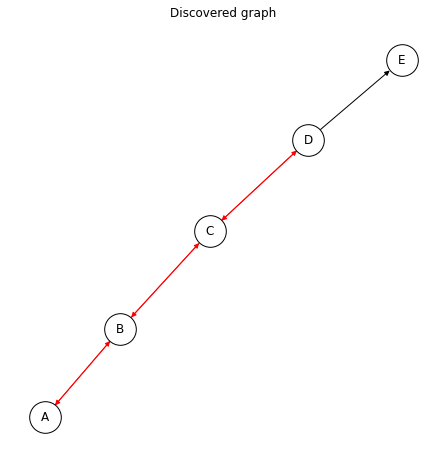

SHD,3


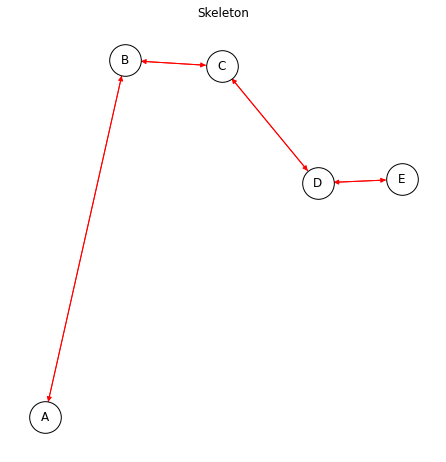

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


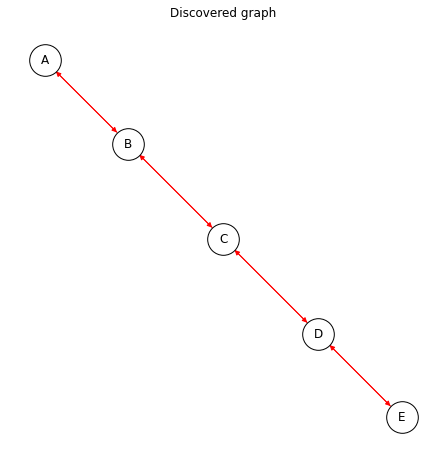

SHD,4


In [9]:
true_graph = nx.DiGraph()
true_graph.add_nodes_from(variables)
true_graph.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')])

for seed in seeds:
    config['seed'] = seed
    run = wandb.init(project="idiod", entity="nadjarutsch", notes='code setup', group='prototype', tags=['chain', 'model-based', 'known intervention targets', 'order independent PC'], config=config, reinit=True)
    with run:
        # generate data
        synth_dataset = data_gen.generate_data(dag=dag, n_obs=N_OBS, int_ratio=INT_RATIO, seed=seed)

        # initial causal discovery (skeleton)
        df = cd.prepare_data(cd="pc", data=synth_dataset, variables=variables)
        
        # logging
        tbl = wandb.Table(dataframe=df)
        wandb.log({"initial mixed data": tbl})
        
        model_pc = cdt.causality.graph.PC(CItest="rcot", alpha=ALPHA_SKELETON)    
        skeleton = model_pc.create_graph_from_data(df)
        
        plt.figure(figsize=(6,6))
        colors = visual.get_colors(skeleton)
        nx.draw(skeleton, with_labels=True, node_size=1000, node_color='w', edgecolors ='black', edge_color=colors)
        wandb.log({"skeleton": wandb.Image(plt)})
        plt.title("Skeleton")
        plt.show()
        
        adj_matrix = torch.from_numpy(nx.to_numpy_array(skeleton))

        # intervention detection (ood)
        print('Creating model...')
        gnmodel = mmlp.GaussianNoiseModel(num_vars=NUM_VARS, hidden_dims=[])
        optimizer = torch.optim.Adam(gnmodel.parameters(), lr=LR)
        ood.cluster(synth_dataset, gnmodel, loss, optimizer, EPOCHS, FIT_EPOCHS, adj_matrix, STDS, BATCH_SIZE)

        synth_dataset.set_true_intervention_targets(true_target_indices)
        df = cd.prepare_data(cd="pc", data=synth_dataset, variables=variables)
        
        # logging
        tbl = wandb.Table(dataframe=df)
        wandb.log({"clustered data": tbl})

        for node in list(df.columns.values[NUM_VARS:]):
            skeleton.add_node(node)
            skeleton.add_edge(node, node.replace("I_",""))

        model_pc = cdt.causality.graph.PC(CItest="rcot", alpha=ALPHA)
        created_graph = model_pc.predict(df, skeleton)
        created_graph.remove_nodes_from(list(df.columns.values[NUM_VARS:]))

        shd = cdt.metrics.SHD(true_graph, created_graph)
        wandb.run.summary["SHD"] = shd

        plt.figure(figsize=(6,6))
        colors = visual.get_colors(created_graph)
        nx.draw(created_graph, with_labels=True, node_size=1000, node_color='w', edgecolors ='black', edge_color=colors)
        wandb.log({"discovered graph": wandb.Image(plt)})
        plt.title("Discovered graph")
        plt.show()
        
        
        